In [1]:
import sklearn
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.compose import make_column_selector, make_column_transformer

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 0. Machine Learning Basics

Machine Learning is the study of computer algorithms that improve automatically through experience - Machine Learning, Tom Mitchell, McGraw Hill, 1997

#### Different types of machine learning:
-  Supervised Learning
    - eg. Regression, Classification
- Unsupervised Learning
    - eg. Clustering, Decision Tree
- Semi-Supervised Learning
- Reinforcement Learning

Interview Question: What's the difference between supervised and unsupervised learning?

#### A Typical Machine Learning Pipeline:
<img src="images/machine_learning_pipeline.png" />

Interview Question: What is a training/validation/test set?

# 1. Data

### 1.1 Load/Import Data

In [4]:
trades = pd.read_csv(Path("../data/raw_data/AAPL_trades.csv"))
quotes = pd.read_csv(Path("../data/raw_data/AAPL_quotes.csv"))

In [5]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283504 entries, 0 to 283503
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              283504 non-null  int64  
 1   Time                                    283504 non-null  object 
 2   Date                                    283504 non-null  object 
 3   Exchange                                283504 non-null  object 
 4   Symbol                                  283504 non-null  object 
 5   Trade_Volume                            283504 non-null  int64  
 6   Trade_Price                             283504 non-null  float64
 7   Sale_Condition                          283504 non-null  object 
 8   Source_of_Trade                         283504 non-null  object 
 9   Trade_Stop_Stock_Indicator              0 non-null       float64
 10  Trade_Correction_Indicator              2835

|Trades Data|Description|
|---|---|
|Unnamed: 0 | dummy index |
|Time| Time the trade was published by SIP|
|Date| Date the trade was published |
|Exchange| The ID of the exchange where the trade took place|
|Symbol| Stock Symbol|
|Trade_Volume | The number of shares traded |
|Trade_Price | The share price of this trade |
|Sale_Condition | The special condition associated with the trade|
|Source_of_Trade | CTA/UTP |
|Trade_Stop_Stock_Indicator | CTA |
|Trade_Correction_Indicator |  |
|Sequence_Number | Message sequence number |
|Trade_Id | Identifier for tracking Trades. Unique per participant per symbol per session within a trading session |
|Trade_Reporting_Facility | The ID of the Trade Reporting Facility |
|Participant_Timestamp | Time when the trade was reported|
|Trade_Reporting_Facility_TRF_Timestamp | If from an Exchange or if the FINRA ADF does not have a proprietary quotation feed, then will be set to blank. If the FINRA ADF or a FINRA TRF provides a proprietary feed of its quotation information, then it’s set to be the time of the quotation|
|Trade_Through_Exempt_Indicator | Denotes whether or not a trade is exempt from Trade Through rules |

|Quotes Data|Description|
|---|---|
|Unnamed: 0 |  |
|Time| Time the quote was published by SIP|
|Exchange|The exchange that issued the quote |
|Symbol| Stock Symbol|
|Bid_Price | The highest price any buyer is willing to pay for shares of this security |
|Bid_Size | The maximum number of shares the highest bidder is willing to buy |
|Offer_Price |The lowest price any seller is willing to take for shares of this security |
|Offer_Size | The maximum number of shares available at the offer price|
|Quote_Condition | Determines whether a quote qualifies for the Best Bid and Best Offer calculation |
|Sequence_Number | message sequence numbers|
|National_BBO_Indicator | The effect this quote has on the NBBO |
|FINRA_BBO_Indicator | Indicates the effect this quote has on the FINRA BBO |
|FINRA_ADF_MPID_Indicator | Denotes  the type of appendage to be included |
|Quote_Cancel_Correction | Indicates that this record is a cancel or a correction of a previous quote|
|Source_Of_Quote | CTA or UTP |
|Retail_Interest_Indicator | Indicates the presence of Retail Price Improvement (RPI) interest between the Bid and the Offer |
|Short_Sale_Restriction_Indicator | Short Sale Restriction status |
|LULD_BBO_Indicator |  |
|SIP_Generated_Message_Identifier | Originator of the message |
|NBBO_LULD_Indicator | LULD Limit Price Band effect on the NBB and NBO |
|Participant_Timestamp | Time the quote was published by the Participant to the SIP |
|FINRA_ADF_Timestamp | A FINRA ADF- or a FINRA TRF-provided timestamp |
|FINRA_ADF_Market_Participant_Quote_Indicator | UTP - FINRA ADF Market Participant Quote Indicator representing the Top of book quotations for each FINRA ADF participant |
|Security_Status_Indicator |  |
|Date |  |
|YearMonth|  |

Note: All column information of trades and quotes data and valid entries for each column can be found at https://www.nyse.com/publicdocs/nyse/data/Daily_TAQ_Client_Spec_v3.0.pdf

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
trades.head()

,Unnamed: 0,Time,Date,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
0,0,2020-01-02 04:00:00.064010,2020-01-02,P,AAPL,3801,295.05,@ T,N,NaN,0,1185,1,,40000063617792,NaN,1
1,1,2020-01-02 04:00:02.828485,2020-01-02,P,AAPL,1,295.08,@FTI,N,NaN,0,1195,2,,40002828108800,NaN,1
2,2,2020-01-02 04:00:06.250392,2020-01-02,Q,AAPL,6,295.25,@ TI,N,NaN,0,1197,1,,40006250366823,NaN,0
3,3,2020-01-02 04:00:06.429757,2020-01-02,P,AAPL,1,295.08,@ TI,N,NaN,0,1198,3,,40006429377792,NaN,0
4,4,2020-01-02 04:00:28.894835,2020-01-02,P,AAPL,3,295.10,@ TI,N,NaN,0,1205,4,,40028894459136,NaN,0


In [8]:
quotes.head()

,Unnamed: 0,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


### 1.2 Data Visualization & Preliminary Analysis

In [9]:
from generators import *

In [6]:
plot_data = quotes.copy()
plot_data.drop(["Unnamed: 0"], axis=1, inplace=True)
plot_data.head()

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,...,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
0,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,...,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
1,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,...,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,...,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
3,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,...,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
4,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,...,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [7]:
converted_PTS = convertParticipantTimestamp(plot_data['Participant_Timestamp'], plot_data["Date"])

In [57]:
plot_data.set_index(converted_PTS, inplace=True)

In [58]:
plot_data.head()

,Time,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator,Date,YearMonth
2020-01-02 04:00:00.064785,2020-01-02 04:00:00.065165,P,AAPL,278.00,7.0,0.00,0.0,R,2228,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064785664,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064787,2020-01-02 04:00:00.065167,P,AAPL,278.00,14.0,0.00,0.0,R,2229,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064787456,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.064790,2020-01-02 04:00:00.065170,P,AAPL,293.72,9.0,0.00,0.0,R,2230,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000064790784,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065302,2020-01-02 04:00:00.065681,P,AAPL,293.72,9.0,327.56,1.0,R,2231,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065302272,NaN,NaN,,2020-01-02,202001
2020-01-02 04:00:00.065358,2020-01-02 04:00:00.065738,P,AAPL,293.72,9.0,320.00,1.0,R,2232,4,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,40000065358592,NaN,NaN,,2020-01-02,202001


In [14]:
hours = plot_data.index.strftime("%H")

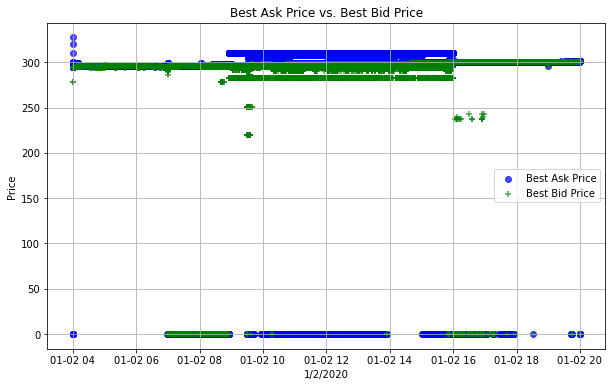

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data.index, plot_data['Offer_Price'], label='Best Ask Price', color='blue', alpha=0.7, marker='o')
plt.scatter(plot_data.index, plot_data['Bid_Price'], label='Best Bid Price', color='green', alpha=0.7, marker='+')
plt.grid(True)
plt.xlabel('1/2/2020')
plt.ylabel('Price')
plt.title('Best Ask Price vs. Best Bid Price')
plt.legend()
plt.grid(True)
plt.show()

### 1.3 Data Cleaning

Before we move towards feature generation and building machine learning models, we have to clean the dataset. The necessary steps to clean the trades and quotes data include:
1. Get rid of unnecessary columns.
2. Get rid of the invalid trades and quotes.
3. Event reconstruction.
4. Only keep the natural best bid/offer or last MQU.
5. Assign Last Active Quote and assign to the corresponding trade.

## SCIKIT-LEARN DESIGN

https://arxiv.org/pdf/1309.0238.pdf

Scikit-Learn’s API is remarkably well designed. These are the main design components of Scikit-Learn.

All objects share a consistent and simple interface:

### Estimators

Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the fit() method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

### Transformers

Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called fit_transform(), which is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).


### Predictors

Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### ...

Reference to the base classes for all estimators in scikit-learn can be found at: https://github.com/scikit-learn/scikit-learn/blob/9aaed4987/sklearn/base.py#L153

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sortedcollections import OrderedSet
import time

In [11]:
class CleanData(BaseEstimator, TransformerMixin):
    
    def __init__(self, dropped_after_hourse=True, droped_irregular_hours=True):
        self.dropped_after_hourse = dropped_after_hourse
        self.droped_irregular_hours = droped_irregular_hours
        
    
    def fit(self, X, y=None):
        if 'Participant_Timestamp' and 'Date' in X.columns:
            self.part_timestamp = convertParticipantTimestamp(X['Participant_Timestamp'], X['Date'])
        else:
            self.part_timestamp = X['Participant_Timestamp']
        return self
    
    
    def transform(self, X):    
        
        # remove rows of all NA
        X = X.dropna(axis=0, how="all")
        X.drop(['Unnamed: 0','Time', 'Date', 'YearMonth'], axis=1, inplace=True, errors='ignore')
        X['Participant_Timestamp'] = self.part_timestamp
        X.index = self.part_timestamp
       
        # drop after hours if specified
        if self.dropped_after_hourse:
            after_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:00:00" or str_t > "16:00:00":
                    after_idx.append(t)
            X.drop(after_idx, inplace=True)
     
        
        # drop irregular hours if specified
        if self.droped_irregular_hours:
            irreg_idx = []
            for t in X.index:
                str_t = t.strftime("%H:%M:%S")
                if str_t < "09:15:00" or str_t > "15:45:00":
                    irreg_idx.append(t)
            X.drop(irreg_idx, axis=0, inplace=True)
        
        
        X = X.sort_index()
 
        return X

In [12]:
clean_pipeline = make_pipeline(
    CleanData()
)

In [13]:
clean_trades = clean_pipeline.fit_transform(trades)

In [14]:
clean_trades.head()

,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Stop_Stock_Indicator,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Trade_Reporting_Facility_TRF_Timestamp,Trade_Through_Exempt_Indicator
2020-01-02 09:15:03.454000,D,AAPL,4,296.25,@ TI,N,NaN,0,16067,706,N,2020-01-02 09:15:03.454000,9.150346e+13,0
2020-01-02 09:15:06.873000,D,AAPL,1,296.25,@ TI,N,NaN,0,16087,707,N,2020-01-02 09:15:06.873000,9.150688e+13,0
2020-01-02 09:15:07.893000,D,AAPL,100,296.15,@ T,N,NaN,0,16088,708,N,2020-01-02 09:15:07.893000,9.150790e+13,0
2020-01-02 09:15:08.263000,D,AAPL,7,296.25,@ TI,N,NaN,0,16090,709,N,2020-01-02 09:15:08.263000,9.150827e+13,0
2020-01-02 09:15:08.271318,P,AAPL,1,296.15,@ TI,N,NaN,0,16091,1544,,2020-01-02 09:15:08.271318,NaN,0


In [15]:
clean_quotes = clean_pipeline.fit_transform(quotes)
clean_quotes.head()

,Exchange,Symbol,Bid_Price,Bid_Size,Offer_Price,Offer_Size,Quote_Condition,Sequence_Number,National_BBO_Indicator,FINRA_BBO_Indicator,FINRA_ADF_MPID_Indicator,Quote_Cancel_Correction,Source_Of_Quote,Retail_Interest_Indicator,Short_Sale_Restriction_Indicator,LULD_BBO_Indicator,SIP_Generated_Message_Identifier,NBBO_LULD_Indicator,Participant_Timestamp,FINRA_ADF_Timestamp,FINRA_ADF_Market_Participant_Quote_Indicator,Security_Status_Indicator
2020-01-02 09:15:00.086755,X,AAPL,283.18,1.0,309.95,1.0,R,202469,2,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,NaN,NaN,
2020-01-02 09:15:08.271548,K,AAPL,296.06,1.0,296.33,1.0,R,202696,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,NaN,NaN,
2020-01-02 09:15:08.271574,Z,AAPL,295.37,3.0,296.82,2.0,R,202697,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,NaN,NaN,
2020-01-02 09:15:08.301537,K,AAPL,296.06,1.0,296.33,1.0,R,202699,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,NaN,NaN,
2020-01-02 09:15:08.301539,Z,AAPL,295.37,3.0,296.82,2.0,R,202698,0,NaN,NaN,NaN,N,NaN,0,NaN,NaN,NaN,2020-01-02 09:15:08.301539,NaN,NaN,


### Reconstructing Events using pandas dataframe's append() method

In [52]:
clean_trades['Is_Quote'] = False
clean_quotes['Is_Quote'] = True

In [53]:
trade_features = ['Symbol', 'Trade_Volume', 'Trade_Price', 'Trade_Id', 'Trade_Reporting_Facility', 'Participant_Timestamp', 'Is_Quote']
quote_features = ['Symbol', 'Bid_Price', 'Bid_Size', 'Offer_Price', 'Offer_Size', 'Participant_Timestamp', 'Is_Quote']

In [136]:
all_events = clean_trades[trade_features].append(clean_quotes[quote_features], ignore_index=True)
all_events.index.name = "RID"

In [137]:
all_events.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN


In [138]:
len(all_events)

2001842

In [139]:
all_events = all_events.sort_values(by=['Participant_Timestamp', all_events.index.name])
all_events.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size
RID,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN


In [140]:
class PreprocessData(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        return
        
    
    def fit(self, X, y=None):
        self.invalid_idx = []
        
        # invalid trades
        self.invalid_idx.extend(X[X['Trade_Price'] < 0].index) 
        self.invalid_idx.extend(X[X['Trade_Volume'] < 0].index)
        self.invalid_idx.extend(X[X['Trade_Reporting_Facility'] == 'D'].index)
        
        # invalid quotes
        self.invalid_idx.extend(X[X['Bid_Price'] < 0].index)
        self.invalid_idx.extend(X[X['Offer_Price'] < X['Bid_Price']].index)
        return self
    
    
    def transform(self, X):    
        
        #drop invalid trades and quotes
        X.drop(self.invalid_idx, inplace=True)
        
        #assign mox identifier
        X['MOX'] = generate_mox_identifier(X['Participant_Timestamp'])
        
        #labeling natural best bid/ask or LMQ as valid (True), otherwise False
        valid_quotes = ~X.duplicated(subset=['MOX'], keep='last')
        X['Valid_Quotes'] = X['Is_Quote'] & valid_quotes #Vectorization
        
        #assign trading directions
        X['Trade_Sign'] = generate_trade_side(X['Trade_Price'])
        
        #assign time in float (measure in seconds)
        X['Participant_Timestamp_f'] = X['Participant_Timestamp'].apply(lambda t : t.timestamp())
        
        return X

#### References: 

All preprossing steps are implemented according to the papaer: The Participant Timestamp: Get The Most Out Of TAQ Data https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984827 

Trade direction is assigned using the tick test, which can be refered from the paper: Inferring Trade Direction from Intraday Data by Charles M. C. Lee, Mark J. Ready https://www.jstor.org/stable/2328845

#### *For labeling valid quotes using AND(&) operator:

|Is_Quote|valid_quotes|Desired|
|---|---|---|
|False|False|False|
|False|True|False|
|True|False|False|
|True|True|True|

In [141]:
preprocess_pipeline = make_pipeline(
    PreprocessData()
)

In [142]:
df_prepared = preprocess_pipeline.fit_transform(all_events)

In [143]:
df_prepared.head(20)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09
244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09
244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09


In [144]:
df_prepared[df_prepared['MOX'] == 11]

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
RID,,,,,,,,,,,,,,,
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
9,AAPL,71.0,296.11,1442.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,NaN,11,False,-1.0,1.577957e+09
244036,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,28.0,296.25,1.0,11,False,NaN,1.577957e+09
244037,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.25,1.0,11,False,NaN,1.577957e+09
244038,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:09.340550,True,296.1,27.0,296.11,1.0,11,True,NaN,1.577957e+09


Visualize the pipeline

In [27]:
# import the set_config module from sklearn
from sklearn import set_config

# set the display option for sklearn to 'diagram'
set_config(display='diagram')

# display the pipeline 
preprocess_pipeline


Pipeline(steps=[('preprocessdata', PreprocessData())])

In [111]:
# df_prepared.to_csv("PreparedData.csv")

## 2. Feature Generation

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer

In [29]:
from generators import *

In [30]:
import sys
sys.path.insert(1, '/testData')

## 2.1 Return and Imbalance

### 2.1.1 Calendar Mode

In [207]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

### 2.1.2 Transaction Mode

In [ ]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

### 2.1.3 Volume Mode

In [297]:
sub_df = df_prepared.copy()[:30000]
sub_df['Trade_Volume'] = sub_df['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [328]:
sub_df = sub_df.reset_index(drop=True)

In [327]:
span = 100
sub_df['Volume_Span_100'] = generate_volume_span(span, sub_df['Trade_Volume'])
sub_df.head(15)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN


#### VolumeAll

In [303]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = i, sub_df.iloc[i]['Volume_Span_100']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_0_100'] = vol_VolumeAll

In [306]:
sub_df.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0


In [309]:
vol_VolumeAll = []
for i in sub_df.index:
    cur, pre = sub_df.iloc[i]['Volume_Span_100'], sub_df.iloc[i]['Volume_Span_200']
    vol_VolumeAll.append(sub_df.iloc[pre:cur+1]['Trade_Volume'].sum())
sub_df['vol_VolumeAll_100_200'] = vol_VolumeAll

In [338]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### Lambda

In [319]:
sub_df['vol_Lambda_0_100'] = generate_vol_lambda(sub_df,'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [322]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN


#### LobImbalance

In [329]:
sub_df['Imbalance'] = (sub_df['Offer_Size'] - sub_df['Bid_Size'])/(sub_df['Offer_Size'] + sub_df['Bid_Size'])

In [332]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0


In [335]:
sub_df['vol_LobImbalance_0_100'] = generate_vol_lobImbalance(sub_df, 'Volume_Span_100', None)

In [339]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667


#### TxnImbalance

In [340]:
sub_df['Vt_Dir'] = sub_df['Trade_Volume'] * sub_df['Trade_Sign']
sub_df.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.0,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.0,NaN,0.0,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.0,NaN,0.0,1.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.0,NaN,NaN,-100.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.0,NaN,NaN,7.0


In [342]:
sub_df['vol_TxnImbalance_0_100'] = generate_vol_txnImbalance(sub_df, 'Volume_Span_100', None, 'vol_VolumeAll_0_100')

In [344]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir,vol_TxnImbalance_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000,NaN,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000,4.0,1.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000,1.0,1.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN,-100.0,-1.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN,7.0,1.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN,-1.0,0.750000
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000,NaN,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000,NaN,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000,-1.0,0.555556
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667,NaN,NaN


#### PastReturn

In [346]:
sub_df['vol_PastReturn_0_100'] = generate_vol_pastReturn(sub_df, 'Volume_Span_100', None)

In [348]:
sub_df.head(10)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_100,Volume_Span_200,vol_VolumeAll_0_100,vol_VolumeAll_100_200,vol_Lambda_0_100,Imbalance,vol_LobImbalance_0_100,Vt_Dir,vol_TxnImbalance_0_100,vol_PastReturn_0_100
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0,0,0.0,0.0,NaN,0.0,0.000000,NaN,NaN,NaN
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,0,0,4.0,0.0,0.000000,NaN,0.000000,4.0,1.000000,0.000000
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,0,0,5.0,0.0,0.000000,NaN,0.000000,1.0,1.000000,0.000000
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,3,0,100.0,105.0,0.000000,NaN,NaN,-100.0,-1.000000,0.000000
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,4,0,7.0,112.0,0.000000,NaN,NaN,7.0,1.000000,0.000000
5,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,4,0,8.0,112.0,0.012500,NaN,NaN,-1.0,0.750000,0.000169
6,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,0.0,0.000000,NaN,NaN,NaN
7,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,4,0,8.0,112.0,NaN,-0.2,-0.100000,NaN,NaN,NaN
8,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,4,0,9.0,112.0,0.011111,NaN,-0.100000,-1.0,0.555556,0.000225
9,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,4,0,9.0,112.0,NaN,0.0,-0.066667,NaN,NaN,NaN


### 2.1.1 VolumeAll

- $\small\text{VolumeAll}(T, \Delta_{1}, \Delta_{2}, M) = \sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t$

In [118]:
test = df_prepared.copy()[:30000]

In [119]:
test['Trade_Volume'] = test['Trade_Volume'].apply(lambda t: t if not np.isnan(t) else 0)

In [147]:
test = test.reset_index(drop=True)

In [203]:
test['cum_volumes'] = test['Trade_Volume'].cumsum()

In [204]:
cname = 'Volume_Span_PartiTime_800'
span = 800
test = generate_volume_span_timestamp(test, cname, span, test['cum_volumes'])

In [205]:
test

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Volume_Span_PartiTime_100,Volume_Span_PartiTime_200,Volume_Span_PartiTime_400,Volume_Span_PartiTime_800,cum_volumes
0,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,0.0
1,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,4.0
2,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,5.0
3,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,2020-01-02 09:15:07.893000,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,105.0
4,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,2020-01-02 09:15:07.893000,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,2020-01-02 09:15:00.086755,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882501,True,295.47,2.0,295.61,1.0,26224,False,NaN,1.577958e+09,2020-01-02 09:31:50.881968,2020-01-02 09:31:50.880578,2020-01-02 09:31:50.878604,2020-01-02 09:31:50.878000,1536048.0
29996,AAPL,200.0,295.54,2200.0,,2020-01-02 09:31:50.882501,False,NaN,NaN,NaN,NaN,26224,False,1.0,1.577958e+09,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.880578,2020-01-02 09:31:50.878144,1536248.0
29997,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882572,True,295.47,2.0,295.87,1.0,26225,True,NaN,1.577958e+09,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.880578,2020-01-02 09:31:50.878144,1536248.0
29998,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:31:50.882580,True,295.47,2.0,295.57,2.0,26226,True,NaN,1.577958e+09,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.882501,2020-01-02 09:31:50.880578,2020-01-02 09:31:50.878144,1536248.0


In [199]:
test.to_csv('Volume_Span_Timestamp.csv')

#### 2.1.1.1 Calendar Mode

In [34]:
test = generateVolumeAll(test)

In [46]:
test.head(20)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,VolumeAll_.0,VolumeAll_.1
RID,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.0
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.0
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.0
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.0
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.0
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.0


In [135]:
for idx, row in test.iterrows():
    print (idx, row['Trade_Volume'])

244031 0.0
0 4.0
1 1.0
2 100.0
3 7.0
4 1.0
244032 0.0
244033 0.0
5 1.0
244034 0.0
244035 0.0
244037 0.0
244038 0.0
6 50.0
244036 0.0
7 70.0
8 100.0
9 71.0
244039 0.0
244040 0.0
244041 0.0
244042 0.0
244043 0.0
244044 0.0
244045 0.0
244046 0.0
244047 0.0
244048 0.0
244049 0.0
244050 0.0
244051 0.0
244052 0.0
10 5.0
244053 0.0
244054 0.0
244055 0.0
244056 0.0
244057 0.0
244058 0.0
244059 0.0
244060 0.0
244061 0.0
244062 0.0
244063 0.0
244064 0.0
244065 0.0
244066 0.0
244067 0.0
11 50.0
244068 0.0
12 100.0
244069 0.0
13 34.0
244070 0.0
14 41.0
15 1.0
16 1.0
244071 0.0
244072 0.0
244073 0.0
244074 0.0
244075 0.0
244076 0.0
17 58.0
244077 0.0
18 2.0
19 50.0
20 63.0
21 287.0
244078 0.0
22 84.0
23 1.0
244079 0.0
244080 0.0
24 50.0
244081 0.0
244082 0.0
244083 0.0
25 8.0
244084 0.0
244085 0.0
26 2.0
244086 0.0
27 8.0
28 4.0
244087 0.0
29 3.0
244088 0.0
244089 0.0
30 20.0
244090 0.0
244091 0.0
244092 0.0
244094 0.0
244093 0.0
31 10.0
32 49.0
33 1.0
34 1.0
244095 0.0
35 84.0
244096 0.0
36 1.0
24

373 120.0
244637 0.0
244638 0.0
244639 0.0
244640 0.0
244641 0.0
244642 0.0
375 1.0
374 100.0
244643 0.0
244644 0.0
244645 0.0
244646 0.0
244647 0.0
244648 0.0
244649 0.0
244650 0.0
244651 0.0
244652 0.0
244653 0.0
244654 0.0
244655 0.0
244656 0.0
244657 0.0
244658 0.0
244659 0.0
376 1.0
377 1.0
244660 0.0
244661 0.0
244662 0.0
244663 0.0
244664 0.0
244665 0.0
244666 0.0
244667 0.0
244668 0.0
244669 0.0
244670 0.0
244671 0.0
244672 0.0
244673 0.0
244674 0.0
244675 0.0
244676 0.0
244677 0.0
244678 0.0
378 3.0
379 1.0
244679 0.0
244680 0.0
244681 0.0
380 1.0
381 17.0
244682 0.0
244683 0.0
244684 0.0
244685 0.0
244686 0.0
244687 0.0
244688 0.0
244689 0.0
244690 0.0
244691 0.0
244692 0.0
382 100.0
244693 0.0
244694 0.0
383 1.0
244695 0.0
384 2.0
385 12.0
244696 0.0
244697 0.0
244698 0.0
386 50.0
244699 0.0
387 20.0
388 2.0
244700 0.0
389 67.0
244701 0.0
244702 0.0
244703 0.0
244704 0.0
244705 0.0
244706 0.0
244707 0.0
244708 0.0
244709 0.0
390 100.0
244710 0.0
244711 0.0
244712 0.0
244713 

245370 0.0
245371 0.0
245372 0.0
640 50.0
641 25.0
245373 0.0
245374 0.0
245375 0.0
245376 0.0
245377 0.0
245378 0.0
245379 0.0
245380 0.0
245381 0.0
245382 0.0
245383 0.0
245384 0.0
245385 0.0
245386 0.0
245387 0.0
245389 0.0
245388 0.0
245390 0.0
245391 0.0
642 10.0
643 2.0
245392 0.0
644 5.0
245393 0.0
245394 0.0
245395 0.0
645 136.0
245396 0.0
646 1.0
647 1.0
245397 0.0
245398 0.0
648 5.0
245399 0.0
649 100.0
245400 0.0
650 200.0
245401 0.0
245402 0.0
651 100.0
245403 0.0
245404 0.0
245405 0.0
245406 0.0
245407 0.0
245408 0.0
245409 0.0
245410 0.0
245411 0.0
245412 0.0
245413 0.0
652 10.0
245414 0.0
245415 0.0
245416 0.0
245417 0.0
245418 0.0
654 100.0
653 214.0
245419 0.0
245420 0.0
245421 0.0
245422 0.0
245423 0.0
245424 0.0
655 176.0
245425 0.0
245426 0.0
245427 0.0
245428 0.0
245429 0.0
245430 0.0
245431 0.0
245432 0.0
656 5.0
657 75.0
245433 0.0
658 1.0
659 300.0
245434 0.0
660 75.0
661 1.0
662 50.0
663 25.0
245435 0.0
245436 0.0
664 20.0
245437 0.0
245438 0.0
245439 0.0
24544

926 10.0
927 10.0
246086 0.0
928 100.0
931 22.0
930 150.0
929 16.0
246087 0.0
932 7.0
933 270.0
935 500.0
934 6.0
936 1000.0
937 192.0
938 5.0
939 15.0
940 2.0
941 1.0
942 1.0
943 100.0
944 20.0
945 2.0
246088 0.0
946 2.0
246089 0.0
947 3.0
246090 0.0
246091 0.0
246092 0.0
948 9.0
246093 0.0
246094 0.0
246095 0.0
952 35.0
951 1000.0
950 17.0
949 563.0
246096 0.0
246100 0.0
246099 0.0
246098 0.0
953 100.0
954 300.0
955 10.0
956 35.0
957 100.0
958 20.0
959 8.0
960 1.0
961 437.0
962 22.0
246097 0.0
246101 0.0
246102 0.0
966 5.0
970 8.0
969 19.0
964 20.0
967 20.0
965 5.0
963 3.0
968 20.0
971 200.0
246103 0.0
972 1.0
973 22.0
246104 0.0
974 100.0
975 22.0
246105 0.0
246106 0.0
246107 0.0
976 100.0
977 100.0
246108 0.0
246109 0.0
246110 0.0
978 23.0
979 100.0
246111 0.0
246112 0.0
246113 0.0
980 100.0
246114 0.0
246115 0.0
246116 0.0
246117 0.0
246118 0.0
246119 0.0
246120 0.0
246121 0.0
246122 0.0
246123 0.0
981 200.0
246124 0.0
246125 0.0
982 1.0
246126 0.0
983 2.0
246127 0.0
984 300.0
246

1423 50.0
1422 10.0
246590 0.0
246591 0.0
246592 0.0
246593 0.0
1426 30.0
1425 20.0
1424 150.0
246595 0.0
246594 0.0
246596 0.0
1428 17.0
1427 8.0
1429 29.0
246597 0.0
246598 0.0
1430 31.0
246599 0.0
246600 0.0
246601 0.0
1431 15.0
1432 1.0
246602 0.0
1433 30.0
1434 200.0
246603 0.0
246604 0.0
246605 0.0
246606 0.0
1435 1.0
246607 0.0
1436 200.0
1437 200.0
1438 200.0
1439 100.0
1440 100.0
1441 100.0
1442 5.0
1443 100.0
246608 0.0
1444 500.0
1445 50.0
246609 0.0
1446 210.0
1447 34.0
246610 0.0
246611 0.0
246612 0.0
1448 100.0
1449 100.0
246614 0.0
246613 0.0
246615 0.0
1450 30.0
246616 0.0
246617 0.0
246618 0.0
246619 0.0
246620 0.0
246621 0.0
246622 0.0
246623 0.0
1452 100.0
1451 70.0
246624 0.0
246626 0.0
246625 0.0
1453 30.0
1454 70.0
246627 0.0
246628 0.0
1455 166.0
246629 0.0
1456 50.0
1457 20.0
1458 200.0
1459 100.0
246630 0.0
1460 8.0
246631 0.0
1462 30.0
1461 50.0
1463 31.0
1464 6.0
1465 100.0
1466 10.0
246632 0.0
246633 0.0
1467 100.0
246634 0.0
246635 0.0
246636 0.0
246637 0.0

1953 5.0
247058 0.0
247059 0.0
247060 0.0
1954 8.0
247062 0.0
247061 0.0
1955 7.0
1956 7.0
1957 18.0
247063 0.0
247064 0.0
247065 0.0
247066 0.0
247068 0.0
1967 3.0
1966 50.0
1965 300.0
1964 118.0
1963 2.0
1962 2.0
1960 7.0
1961 150.0
1958 75.0
247070 0.0
247069 0.0
1959 13.0
247067 0.0
1968 5.0
1969 75.0
247071 0.0
247072 0.0
247073 0.0
1970 5.0
247074 0.0
247075 0.0
1971 25.0
1972 100.0
247076 0.0
1973 100.0
247077 0.0
1974 5.0
1975 10.0
247078 0.0
1976 1111.0
247079 0.0
247080 0.0
247081 0.0
247082 0.0
247083 0.0
247084 0.0
1977 6.0
1978 46.0
1979 75.0
1982 200.0
247086 0.0
1983 96.0
1981 3.0
247085 0.0
1980 1.0
1984 4.0
247087 0.0
247088 0.0
1985 200.0
247089 0.0
247090 0.0
247091 0.0
247092 0.0
1986 400.0
247093 0.0
247094 0.0
247095 0.0
1987 5.0
247096 0.0
247097 0.0
1992 4.0
1991 10.0
1990 2.0
1988 100.0
1989 50.0
247098 0.0
1993 1.0
1994 10.0
247099 0.0
1995 50.0
1996 11.0
247100 0.0
1997 20.0
1999 1.0
1998 450.0
2000 100.0
2001 17.0
247101 0.0
2002 100.0
247104 0.0
2006 10.0
2

247590 0.0
247591 0.0
247592 0.0
247593 0.0
247594 0.0
247595 0.0
247596 0.0
247597 0.0
247598 0.0
2421 200.0
2422 2.0
247599 0.0
247600 0.0
247601 0.0
247602 0.0
2423 98.0
247603 0.0
247604 0.0
247605 0.0
2424 200.0
247606 0.0
247607 0.0
247608 0.0
247609 0.0
247610 0.0
247611 0.0
2425 16.0
247612 0.0
247613 0.0
247614 0.0
247615 0.0
247616 0.0
247617 0.0
2426 1.0
247618 0.0
247619 0.0
247620 0.0
2427 47.0
247621 0.0
2428 199.0
247622 0.0
247623 0.0
2429 15.0
2430 2.0
247624 0.0
2432 9.0
2433 25.0
2434 5.0
2435 2.0
2431 257.0
247625 0.0
247626 0.0
247627 0.0
247628 0.0
247629 0.0
247630 0.0
2436 1.0
247631 0.0
247632 0.0
247633 0.0
247634 0.0
247635 0.0
247636 0.0
2437 2.0
247637 0.0
247638 0.0
247639 0.0
247640 0.0
247641 0.0
2438 53.0
2439 72.0
2440 100.0
2441 14.0
2442 49.0
2443 12.0
2444 1529.0
2445 100.0
2446 100.0
2447 100.0
247642 0.0
247643 0.0
247644 0.0
247645 0.0
247646 0.0
247647 0.0
2448 50.0
2449 200.0
2450 50.0
247648 0.0
2451 100.0
247649 0.0
247650 0.0
247651 0.0
2452

248379 0.0
248380 0.0
248381 0.0
2739 100.0
248382 0.0
248383 0.0
248384 0.0
248385 0.0
248386 0.0
248387 0.0
248388 0.0
248389 0.0
248390 0.0
2740 800.0
2741 100.0
2742 100.0
2743 100.0
2744 200.0
248391 0.0
248392 0.0
248393 0.0
2745 100.0
248394 0.0
248395 0.0
2746 100.0
248396 0.0
248397 0.0
2747 200.0
2748 100.0
2749 200.0
2750 100.0
2751 100.0
248398 0.0
2752 20.0
2753 100.0
248399 0.0
248400 0.0
248401 0.0
248402 0.0
248403 0.0
248404 0.0
248405 0.0
248406 0.0
248407 0.0
248408 0.0
248409 0.0
248410 0.0
248411 0.0
248412 0.0
248413 0.0
248414 0.0
2754 100.0
248415 0.0
2755 200.0
248416 0.0
248417 0.0
248418 0.0
248419 0.0
2756 105.0
248420 0.0
248421 0.0
248422 0.0
248423 0.0
248424 0.0
248425 0.0
248426 0.0
248427 0.0
248428 0.0
248429 0.0
248430 0.0
248431 0.0
248432 0.0
248433 0.0
248434 0.0
248435 0.0
248436 0.0
2757 25.0
248437 0.0
248438 0.0
248439 0.0
248440 0.0
248441 0.0
248442 0.0
248443 0.0
248444 0.0
248445 0.0
248446 0.0
248447 0.0
248448 0.0
248449 0.0
2758 500.0
2

249185 0.0
249186 0.0
249187 0.0
2988 20.0
249188 0.0
249189 0.0
249190 0.0
2989 3.0
249191 0.0
249192 0.0
249193 0.0
249194 0.0
249195 0.0
249196 0.0
249197 0.0
249198 0.0
2990 100.0
249199 0.0
249200 0.0
2991 100.0
2992 100.0
249201 0.0
249202 0.0
249203 0.0
2993 200.0
249204 0.0
249205 0.0
2994 19.0
2995 1.0
2996 10.0
2997 10.0
2998 4.0
3000 1.0
3001 100.0
2999 99.0
3002 100.0
3003 1.0
3004 100.0
3005 50.0
3006 100.0
3007 100.0
249206 0.0
249207 0.0
249208 0.0
249209 0.0
249210 0.0
249211 0.0
249212 0.0
249213 0.0
249214 0.0
249215 0.0
249216 0.0
249217 0.0
249218 0.0
249219 0.0
249220 0.0
249221 0.0
249222 0.0
249223 0.0
249224 0.0
249225 0.0
249226 0.0
249227 0.0
249228 0.0
249229 0.0
249230 0.0
3008 200.0
249231 0.0
249232 0.0
249233 0.0
249234 0.0
249235 0.0
249236 0.0
3009 23.0
3010 52.0
3011 928.0
3013 100.0
3012 300.0
3015 50.0
3014 50.0
249237 0.0
3016 349.0
3018 50.0
3019 1.0
3017 100.0
249238 0.0
249239 0.0
249240 0.0
249241 0.0
249242 0.0
249243 0.0
249244 0.0
249245 0.0


249843 0.0
249844 0.0
249845 0.0
249846 0.0
249847 0.0
3259 30.0
249848 0.0
249849 0.0
3260 22.0
3261 78.0
249850 0.0
249851 0.0
3262 94.0
249852 0.0
3263 10.0
249853 0.0
249854 0.0
249855 0.0
3264 190.0
3265 9.0
249856 0.0
249857 0.0
249858 0.0
249859 0.0
249860 0.0
249861 0.0
249862 0.0
249863 0.0
3266 59.0
249864 0.0
249865 0.0
3267 59.0
249866 0.0
3268 118.0
249867 0.0
3270 41.0
3269 59.0
249868 0.0
3271 41.0
249869 0.0
3272 100.0
249870 0.0
249871 0.0
249872 0.0
249873 0.0
249874 0.0
249875 0.0
3273 50.0
3274 50.0
249876 0.0
249877 0.0
249878 0.0
3275 63.0
3276 50.0
3277 37.0
249879 0.0
3278 17.0
3279 42.0
249880 0.0
249881 0.0
3280 100.0
249882 0.0
249883 0.0
249884 0.0
249885 0.0
3281 100.0
249886 0.0
3282 110.0
249887 0.0
249888 0.0
249889 0.0
249890 0.0
3283 34.0
249891 0.0
3284 300.0
249892 0.0
249893 0.0
249894 0.0
3285 100.0
3286 100.0
3289 100.0
3288 300.0
3287 100.0
249895 0.0
249896 0.0
249897 0.0
249898 0.0
249899 0.0
3290 100.0
249900 0.0
3291 74.0
3292 200.0
249901 0.

250722 0.0
250723 0.0
250724 0.0
250725 0.0
250726 0.0
250727 0.0
250728 0.0
250729 0.0
3492 100.0
250730 0.0
250731 0.0
250732 0.0
250733 0.0
250734 0.0
250735 0.0
250736 0.0
3493 86.0
250737 0.0
250738 0.0
250739 0.0
250740 0.0
250741 0.0
250742 0.0
250743 0.0
250744 0.0
3494 100.0
250745 0.0
250746 0.0
250747 0.0
250748 0.0
250749 0.0
250750 0.0
250751 0.0
250752 0.0
250753 0.0
250754 0.0
3495 5.0
250755 0.0
250756 0.0
250757 0.0
250758 0.0
250759 0.0
250760 0.0
250761 0.0
250762 0.0
250763 0.0
250764 0.0
250765 0.0
250766 0.0
250767 0.0
250768 0.0
250769 0.0
250770 0.0
250771 0.0
250772 0.0
250773 0.0
3496 100.0
250774 0.0
250775 0.0
250776 0.0
250777 0.0
250778 0.0
250779 0.0
250780 0.0
250781 0.0
250782 0.0
250783 0.0
250784 0.0
250785 0.0
250786 0.0
250787 0.0
250788 0.0
250789 0.0
250790 0.0
250791 0.0
250792 0.0
250793 0.0
250794 0.0
250795 0.0
250796 0.0
250797 0.0
250798 0.0
250799 0.0
250800 0.0
250801 0.0
250802 0.0
250803 0.0
250804 0.0
250805 0.0
250806 0.0
250807 0.0
25

251625 0.0
251626 0.0
251627 0.0
251628 0.0
251629 0.0
251630 0.0
251631 0.0
251632 0.0
251633 0.0
251634 0.0
3637 100.0
251635 0.0
251636 0.0
251637 0.0
251638 0.0
3638 100.0
251639 0.0
251640 0.0
3639 30.0
251641 0.0
3640 20.0
251642 0.0
3641 200.0
3643 100.0
3642 238.0
251643 0.0
251644 0.0
251645 0.0
251646 0.0
251647 0.0
3645 123.0
3644 100.0
251649 0.0
251648 0.0
251650 0.0
251651 0.0
251652 0.0
251653 0.0
251654 0.0
251655 0.0
251656 0.0
251657 0.0
251658 0.0
251659 0.0
251660 0.0
251661 0.0
251662 0.0
251663 0.0
251664 0.0
251665 0.0
251666 0.0
3646 100.0
251668 0.0
251669 0.0
251667 0.0
3648 100.0
3647 100.0
251670 0.0
251671 0.0
251672 0.0
251673 0.0
3649 100.0
251674 0.0
251675 0.0
251676 0.0
251677 0.0
251678 0.0
251679 0.0
251680 0.0
251681 0.0
251682 0.0
251683 0.0
251684 0.0
251685 0.0
251686 0.0
251687 0.0
3650 100.0
251688 0.0
251689 0.0
251690 0.0
251691 0.0
251692 0.0
251693 0.0
251694 0.0
251695 0.0
251696 0.0
251697 0.0
251698 0.0
251699 0.0
251700 0.0
251701 0.0
2

252649 0.0
252650 0.0
252651 0.0
252652 0.0
252653 0.0
252654 0.0
252655 0.0
252656 0.0
252657 0.0
252658 0.0
252659 0.0
3825 100.0
3827 100.0
3826 100.0
252660 0.0
252661 0.0
3828 100.0
3829 100.0
252662 0.0
252663 0.0
3830 10.0
252664 0.0
3831 10.0
3832 400.0
252665 0.0
3833 100.0
252666 0.0
252667 0.0
252668 0.0
252669 0.0
252670 0.0
252671 0.0
252672 0.0
252673 0.0
252674 0.0
252675 0.0
252676 0.0
252677 0.0
252678 0.0
252679 0.0
3835 43.0
252680 0.0
3834 100.0
252681 0.0
3836 29.0
252682 0.0
3837 27.0
252683 0.0
252684 0.0
252685 0.0
3839 12.0
3838 61.0
252686 0.0
252687 0.0
252688 0.0
252689 0.0
252690 0.0
252691 0.0
252692 0.0
252693 0.0
252694 0.0
252695 0.0
252696 0.0
252697 0.0
252698 0.0
3840 5.0
252699 0.0
3842 100.0
3841 100.0
252700 0.0
252701 0.0
252702 0.0
252703 0.0
3843 6.0
252704 0.0
252705 0.0
252706 0.0
252708 0.0
3845 100.0
3844 277.0
252707 0.0
252709 0.0
252710 0.0
252711 0.0
252712 0.0
3847 100.0
252714 0.0
3846 123.0
252713 0.0
252715 0.0
252716 0.0
252717 0.0

254199 0.0
254200 0.0
254201 0.0
254202 0.0
254203 0.0
254204 0.0
254205 0.0
4063 174.0
254206 0.0
254207 0.0
254208 0.0
254209 0.0
254210 0.0
4064 163.0
254211 0.0
254212 0.0
4065 154.0
254213 0.0
254214 0.0
254215 0.0
254216 0.0
4066 100.0
4067 1600.0
254217 0.0
4068 100.0
254218 0.0
254219 0.0
254220 0.0
254221 0.0
254222 0.0
254223 0.0
254224 0.0
254225 0.0
254226 0.0
254227 0.0
254228 0.0
254229 0.0
254230 0.0
254231 0.0
254232 0.0
254233 0.0
254234 0.0
254235 0.0
254236 0.0
254237 0.0
4069 154.0
254238 0.0
4070 100.0
254239 0.0
254240 0.0
4071 154.0
254241 0.0
254242 0.0
254243 0.0
254244 0.0
254245 0.0
254246 0.0
4072 100.0
254247 0.0
4073 90.0
254248 0.0
4074 36.0
254249 0.0
254250 0.0
4075 46.0
254251 0.0
254252 0.0
4076 100.0
254253 0.0
254254 0.0
4077 50.0
254255 0.0
254256 0.0
254257 0.0
254258 0.0
254259 0.0
254260 0.0
254261 0.0
254262 0.0
254263 0.0
254264 0.0
4078 10.0
254265 0.0
254266 0.0
254267 0.0
254268 0.0
254269 0.0
254270 0.0
254271 0.0
254272 0.0
254273 0.0
254

255232 0.0
255233 0.0
255234 0.0
255235 0.0
255236 0.0
4235 100.0
255237 0.0
255238 0.0
255239 0.0
255240 0.0
255241 0.0
255242 0.0
255243 0.0
255244 0.0
255245 0.0
255246 0.0
255247 0.0
255248 0.0
255249 0.0
255250 0.0
4236 100.0
4237 61.0
255251 0.0
4238 39.0
4239 72.0
255252 0.0
255253 0.0
255254 0.0
255255 0.0
4240 100.0
255256 0.0
4242 38.0
4243 1.0
4241 328.0
255257 0.0
255258 0.0
4244 14.0
4245 14.0
255259 0.0
4246 100.0
4247 25.0
255260 0.0
255261 0.0
255262 0.0
255263 0.0
255264 0.0
4248 74.0
255265 0.0
255266 0.0
255267 0.0
4249 100.0
255268 0.0
255269 0.0
255270 0.0
255271 0.0
255272 0.0
255273 0.0
255274 0.0
255275 0.0
255276 0.0
255277 0.0
255278 0.0
255279 0.0
4250 7.0
255280 0.0
255281 0.0
255282 0.0
4251 26.0
255283 0.0
4252 74.0
255284 0.0
255285 0.0
255286 0.0
255287 0.0
255288 0.0
255289 0.0
255290 0.0
255291 0.0
255292 0.0
255293 0.0
255294 0.0
255295 0.0
255296 0.0
255297 0.0
255298 0.0
255299 0.0
255300 0.0
255301 0.0
4253 20.0
255302 0.0
255303 0.0
4254 30.0
2553

256118 0.0
256119 0.0
256120 0.0
256121 0.0
256122 0.0
4398 300.0
256123 0.0
256124 0.0
256125 0.0
256126 0.0
256127 0.0
256128 0.0
256129 0.0
256130 0.0
256131 0.0
256132 0.0
256133 0.0
256134 0.0
256135 0.0
256136 0.0
256137 0.0
256138 0.0
256139 0.0
256140 0.0
256141 0.0
256142 0.0
256143 0.0
256144 0.0
256145 0.0
256146 0.0
256147 0.0
256148 0.0
256149 0.0
256150 0.0
256151 0.0
256152 0.0
256153 0.0
256154 0.0
4399 1500.0
256155 0.0
256156 0.0
256157 0.0
256158 0.0
256159 0.0
256160 0.0
256161 0.0
4400 5.0
256162 0.0
256163 0.0
256164 0.0
256165 0.0
256166 0.0
256167 0.0
256168 0.0
256169 0.0
256170 0.0
256171 0.0
256172 0.0
256173 0.0
256174 0.0
256175 0.0
256176 0.0
256177 0.0
256178 0.0
256179 0.0
256180 0.0
256181 0.0
256182 0.0
256183 0.0
256184 0.0
256185 0.0
256186 0.0
256187 0.0
256188 0.0
256189 0.0
256190 0.0
256191 0.0
256192 0.0
256193 0.0
256194 0.0
256195 0.0
256196 0.0
256197 0.0
256198 0.0
256199 0.0
256200 0.0
256201 0.0
256202 0.0
256203 0.0
256204 0.0
256205 0.0


257070 0.0
257071 0.0
257072 0.0
257073 0.0
257074 0.0
257075 0.0
257076 0.0
257077 0.0
4551 100.0
257078 0.0
257079 0.0
257080 0.0
257081 0.0
257082 0.0
257083 0.0
257084 0.0
4554 100.0
4553 25.0
4552 100.0
257085 0.0
257086 0.0
257087 0.0
257088 0.0
257089 0.0
257090 0.0
257091 0.0
4555 100.0
257092 0.0
257093 0.0
4556 100.0
257094 0.0
257095 0.0
257096 0.0
257097 0.0
4557 100.0
257098 0.0
257099 0.0
257100 0.0
257101 0.0
257102 0.0
257103 0.0
257104 0.0
257105 0.0
257106 0.0
257107 0.0
257108 0.0
257109 0.0
4558 3.0
257110 0.0
257111 0.0
257112 0.0
257113 0.0
257114 0.0
257115 0.0
257116 0.0
257117 0.0
257118 0.0
257119 0.0
257120 0.0
257121 0.0
257122 0.0
257123 0.0
4559 94.0
257124 0.0
257125 0.0
257126 0.0
257127 0.0
257128 0.0
257129 0.0
257130 0.0
4560 100.0
257131 0.0
257132 0.0
257133 0.0
257134 0.0
257135 0.0
257136 0.0
257137 0.0
257138 0.0
257139 0.0
257140 0.0
257141 0.0
257142 0.0
257143 0.0
257144 0.0
4561 5.0
257145 0.0
257146 0.0
257147 0.0
257148 0.0
4562 1.0
257149 

258048 0.0
258049 0.0
258050 0.0
258051 0.0
258052 0.0
258053 0.0
258054 0.0
258055 0.0
258056 0.0
258057 0.0
258058 0.0
258059 0.0
258060 0.0
258061 0.0
258062 0.0
258063 0.0
258064 0.0
258065 0.0
258066 0.0
258067 0.0
258068 0.0
258069 0.0
258070 0.0
258071 0.0
4718 90.0
4717 100.0
258072 0.0
258073 0.0
258074 0.0
258075 0.0
258076 0.0
258077 0.0
258078 0.0
258079 0.0
4719 100.0
4720 100.0
4721 100.0
4722 100.0
258080 0.0
258081 0.0
258082 0.0
258083 0.0
258084 0.0
258085 0.0
258086 0.0
258087 0.0
258088 0.0
258089 0.0
258090 0.0
258091 0.0
258092 0.0
258093 0.0
258094 0.0
258095 0.0
258096 0.0
258097 0.0
258098 0.0
258099 0.0
258100 0.0
258101 0.0
258102 0.0
258103 0.0
258104 0.0
258105 0.0
258106 0.0
258107 0.0
258108 0.0
4723 1.0
258109 0.0
258110 0.0
258111 0.0
258112 0.0
258113 0.0
258114 0.0
258115 0.0
258116 0.0
258117 0.0
258118 0.0
258119 0.0
258120 0.0
258121 0.0
258122 0.0
258123 0.0
258124 0.0
258125 0.0
258126 0.0
4724 100.0
258127 0.0
258128 0.0
258129 0.0
258130 0.0
25

259006 0.0
4893 33.0
259007 0.0
259008 0.0
259009 0.0
259010 0.0
259011 0.0
259012 0.0
259013 0.0
259014 0.0
259015 0.0
259016 0.0
259017 0.0
259018 0.0
4894 100.0
259020 0.0
259019 0.0
259021 0.0
259022 0.0
259023 0.0
259024 0.0
259025 0.0
259026 0.0
259027 0.0
259028 0.0
4895 2.0
259029 0.0
4896 2.0
4897 2.0
4898 2.0
4899 2.0
4900 2.0
259030 0.0
259031 0.0
259032 0.0
259033 0.0
259034 0.0
259035 0.0
259036 0.0
259037 0.0
259038 0.0
259039 0.0
259040 0.0
259041 0.0
259042 0.0
259043 0.0
259044 0.0
259045 0.0
259046 0.0
259047 0.0
259048 0.0
259049 0.0
259050 0.0
259051 0.0
259052 0.0
259053 0.0
259054 0.0
259055 0.0
259056 0.0
259057 0.0
259058 0.0
259059 0.0
259060 0.0
259061 0.0
259062 0.0
259063 0.0
259064 0.0
259065 0.0
259066 0.0
259067 0.0
259068 0.0
259069 0.0
259070 0.0
259071 0.0
259072 0.0
259073 0.0
259074 0.0
259075 0.0
259076 0.0
259077 0.0
259078 0.0
259079 0.0
259080 0.0
259081 0.0
259082 0.0
259083 0.0
4901 500.0
259084 0.0
259085 0.0
259086 0.0
259087 0.0
4902 100.0
2

259982 0.0
259983 0.0
259984 0.0
259985 0.0
259986 0.0
259987 0.0
5033 50.0
259988 0.0
259989 0.0
259990 0.0
259991 0.0
259992 0.0
259993 0.0
5035 300.0
5034 100.0
5036 100.0
259994 0.0
259995 0.0
5037 62.0
259996 0.0
259997 0.0
259998 0.0
259999 0.0
260000 0.0
260001 0.0
260002 0.0
260003 0.0
5038 10.0
5039 21.0
5040 79.0
260004 0.0
5041 21.0
260005 0.0
260006 0.0
260007 0.0
260008 0.0
260009 0.0
260010 0.0
260011 0.0
260012 0.0
260013 0.0
260014 0.0
260015 0.0
260016 0.0
260017 0.0
260018 0.0
260019 0.0
260020 0.0
260021 0.0
260022 0.0
260023 0.0
260024 0.0
260025 0.0
260026 0.0
5042 35.0
260027 0.0
260028 0.0
260029 0.0
260030 0.0
260031 0.0
260032 0.0
260033 0.0
260034 0.0
260035 0.0
260036 0.0
260037 0.0
260038 0.0
260039 0.0
260040 0.0
260041 0.0
260042 0.0
260043 0.0
260044 0.0
260045 0.0
260046 0.0
260047 0.0
260048 0.0
260049 0.0
260050 0.0
260051 0.0
260052 0.0
260053 0.0
260054 0.0
260055 0.0
260056 0.0
260057 0.0
260058 0.0
260059 0.0
260060 0.0
260061 0.0
260062 0.0
260063

261030 0.0
261031 0.0
261032 0.0
261033 0.0
261034 0.0
261035 0.0
261036 0.0
261037 0.0
261039 0.0
261038 0.0
261040 0.0
261041 0.0
261042 0.0
261043 0.0
261044 0.0
261045 0.0
261046 0.0
261047 0.0
261048 0.0
261049 0.0
261050 0.0
261051 0.0
261052 0.0
261053 0.0
261054 0.0
5141 300.0
261055 0.0
261056 0.0
261057 0.0
261058 0.0
261059 0.0
5142 100.0
261060 0.0
261061 0.0
261062 0.0
5143 10.0
261063 0.0
5144 100.0
261064 0.0
261065 0.0
261066 0.0
261067 0.0
261068 0.0
261069 0.0
5145 100.0
261070 0.0
261071 0.0
261072 0.0
261073 0.0
261074 0.0
261075 0.0
261076 0.0
261077 0.0
261078 0.0
261079 0.0
261080 0.0
261081 0.0
261082 0.0
261083 0.0
261084 0.0
261085 0.0
261086 0.0
261087 0.0
261088 0.0
261089 0.0
261090 0.0
261091 0.0
261092 0.0
261093 0.0
5146 90.0
261094 0.0
261095 0.0
261096 0.0
261097 0.0
261099 0.0
261098 0.0
261100 0.0
261101 0.0
5147 2.0
261102 0.0
261103 0.0
261104 0.0
261105 0.0
261106 0.0
261107 0.0
261108 0.0
5149 17.0
5148 20.0
261109 0.0
261110 0.0
5150 78.0
261111

261770 0.0
261771 0.0
261772 0.0
261773 0.0
261774 0.0
261775 0.0
261776 0.0
261777 0.0
261778 0.0
5244 100.0
261779 0.0
261780 0.0
261781 0.0
261782 0.0
261783 0.0
261784 0.0
261785 0.0
261786 0.0
261787 0.0
261788 0.0
261789 0.0
261790 0.0
261791 0.0
261792 0.0
261793 0.0
261794 0.0
261795 0.0
261796 0.0
261797 0.0
261798 0.0
261799 0.0
261800 0.0
261801 0.0
261802 0.0
261803 0.0
261804 0.0
5245 2.0
5246 69.0
261805 0.0
261806 0.0
5247 16.0
5248 100.0
5249 100.0
261807 0.0
5250 100.0
5251 100.0
5252 100.0
261808 0.0
261809 0.0
261810 0.0
261811 0.0
261812 0.0
261813 0.0
261814 0.0
261815 0.0
261816 0.0
261817 0.0
261818 0.0
261819 0.0
261820 0.0
261821 0.0
261822 0.0
261823 0.0
261824 0.0
261825 0.0
261826 0.0
261827 0.0
261828 0.0
261829 0.0
261830 0.0
261831 0.0
261832 0.0
261833 0.0
261834 0.0
261835 0.0
261836 0.0
261837 0.0
261838 0.0
261839 0.0
261840 0.0
261841 0.0
261842 0.0
261843 0.0
261844 0.0
261845 0.0
261846 0.0
261847 0.0
261848 0.0
261849 0.0
261850 0.0
261851 0.0
261

262712 0.0
262713 0.0
262714 0.0
262715 0.0
262716 0.0
262717 0.0
262718 0.0
262719 0.0
262720 0.0
262721 0.0
262722 0.0
262723 0.0
262724 0.0
262725 0.0
262726 0.0
262727 0.0
262728 0.0
262729 0.0
262730 0.0
262731 0.0
262732 0.0
262733 0.0
262734 0.0
5388 300.0
262735 0.0
262736 0.0
262737 0.0
262738 0.0
262739 0.0
262740 0.0
262741 0.0
262742 0.0
262743 0.0
262744 0.0
262745 0.0
262746 0.0
262747 0.0
262748 0.0
262749 0.0
262750 0.0
5389 2.0
262751 0.0
262752 0.0
262753 0.0
262754 0.0
262755 0.0
262756 0.0
262757 0.0
262758 0.0
262759 0.0
262760 0.0
262761 0.0
262762 0.0
262763 0.0
262764 0.0
5390 2400.0
262765 0.0
262766 0.0
262767 0.0
262768 0.0
262769 0.0
262770 0.0
262771 0.0
262772 0.0
262773 0.0
262774 0.0
262775 0.0
5391 16.0
5392 16.0
262776 0.0
262777 0.0
262778 0.0
262779 0.0
262780 0.0
262781 0.0
262782 0.0
262783 0.0
262784 0.0
5394 34.0
5393 50.0
262785 0.0
262786 0.0
262787 0.0
262788 0.0
5396 300.0
5395 300.0
262789 0.0
262790 0.0
262791 0.0
262792 0.0
262793 0.0
2627

5547 10.0
263714 0.0
263715 0.0
263716 0.0
263717 0.0
263718 0.0
5548 100.0
263719 0.0
263720 0.0
263721 0.0
5549 100.0
263722 0.0
5550 13.0
263723 0.0
5551 100.0
263724 0.0
5552 100.0
263725 0.0
263726 0.0
263727 0.0
263728 0.0
263730 0.0
263729 0.0
5553 100.0
263731 0.0
263732 0.0
263733 0.0
5554 40.0
263734 0.0
263735 0.0
263736 0.0
263737 0.0
263738 0.0
263739 0.0
263740 0.0
5555 100.0
263741 0.0
5556 100.0
263742 0.0
263743 0.0
263744 0.0
5557 100.0
263745 0.0
263746 0.0
263747 0.0
5558 100.0
263748 0.0
5559 100.0
263749 0.0
263750 0.0
263751 0.0
263752 0.0
263753 0.0
263754 0.0
263755 0.0
5560 100.0
263756 0.0
5561 107.0
263757 0.0
5562 100.0
263758 0.0
263759 0.0
5563 100.0
263760 0.0
263761 0.0
263762 0.0
5564 100.0
263763 0.0
263764 0.0
263765 0.0
5566 600.0
5565 100.0
263766 0.0
263767 0.0
263768 0.0
263769 0.0
263770 0.0
263771 0.0
263772 0.0
263773 0.0
263774 0.0
263775 0.0
263776 0.0
263777 0.0
263778 0.0
263779 0.0
263780 0.0
263781 0.0
263782 0.0
263783 0.0
263784 0.0
26

264598 0.0
264599 0.0
264600 0.0
264601 0.0
264602 0.0
264603 0.0
264604 0.0
264605 0.0
264606 0.0
264607 0.0
264608 0.0
264609 0.0
264610 0.0
264611 0.0
264612 0.0
264613 0.0
264614 0.0
264615 0.0
264616 0.0
264617 0.0
264618 0.0
264619 0.0
264620 0.0
264621 0.0
264622 0.0
264623 0.0
264624 0.0
5670 99.0
264625 0.0
264626 0.0
264627 0.0
5671 96.0
264628 0.0
264629 0.0
264630 0.0
264631 0.0
5672 32.0
5673 48.0
264632 0.0
5674 32.0
264633 0.0
264634 0.0
264635 0.0
264636 0.0
5675 50.0
264637 0.0
264638 0.0
264639 0.0
264640 0.0
264641 0.0
264642 0.0
5676 200.0
264643 0.0
264644 0.0
264645 0.0
264646 0.0
5677 100.0
264647 0.0
5678 50.0
5679 50.0
5680 50.0
264648 0.0
264649 0.0
264650 0.0
264651 0.0
264652 0.0
264653 0.0
264654 0.0
264655 0.0
264656 0.0
264657 0.0
264658 0.0
5681 25.0
264659 0.0
264660 0.0
5683 50.0
5682 150.0
264661 0.0
264662 0.0
264663 0.0
264664 0.0
5684 25.0
264665 0.0
264666 0.0
264667 0.0
264668 0.0
264669 0.0
264670 0.0
264671 0.0
264672 0.0
264673 0.0
264674 0.0


265653 0.0
265654 0.0
265655 0.0
265656 0.0
265657 0.0
265658 0.0
265659 0.0
265660 0.0
265661 0.0
265662 0.0
265663 0.0
265664 0.0
265665 0.0
265666 0.0
265667 0.0
265668 0.0
265669 0.0
265670 0.0
265671 0.0
5840 200.0
265672 0.0
5841 100.0
265673 0.0
265674 0.0
265675 0.0
265676 0.0
265677 0.0
265678 0.0
265679 0.0
265680 0.0
5842 100.0
265681 0.0
265682 0.0
265683 0.0
265684 0.0
265685 0.0
5843 1.0
265686 0.0
265687 0.0
265688 0.0
265689 0.0
5846 50.0
5848 100.0
5847 100.0
5845 100.0
5844 50.0
265690 0.0
5849 200.0
265691 0.0
265692 0.0
265693 0.0
265694 0.0
265695 0.0
265696 0.0
5850 100.0
265697 0.0
265698 0.0
265699 0.0
265700 0.0
5851 100.0
5852 30.0
265701 0.0
265702 0.0
265703 0.0
265704 0.0
5853 100.0
265705 0.0
265706 0.0
265707 0.0
265708 0.0
265709 0.0
265710 0.0
265711 0.0
265712 0.0
5854 70.0
265713 0.0
265714 0.0
265715 0.0
265716 0.0
265717 0.0
265718 0.0
265719 0.0
265720 0.0
265721 0.0
265722 0.0
265723 0.0
5855 100.0
265724 0.0
265725 0.0
265726 0.0
265727 0.0
5856 

266562 0.0
266563 0.0
266564 0.0
266565 0.0
266566 0.0
266567 0.0
266568 0.0
266569 0.0
266570 0.0
266571 0.0
266572 0.0
266573 0.0
266574 0.0
266575 0.0
266576 0.0
5956 100.0
5957 100.0
266577 0.0
5958 100.0
266578 0.0
266579 0.0
5959 200.0
266580 0.0
266581 0.0
266582 0.0
266583 0.0
266584 0.0
266585 0.0
266586 0.0
266587 0.0
266588 0.0
266589 0.0
266590 0.0
266591 0.0
266592 0.0
266593 0.0
266594 0.0
266595 0.0
266596 0.0
266597 0.0
266598 0.0
266599 0.0
266600 0.0
266601 0.0
266602 0.0
266603 0.0
266604 0.0
266605 0.0
266606 0.0
5960 300.0
266608 0.0
266607 0.0
266609 0.0
266610 0.0
266611 0.0
266612 0.0
266613 0.0
266614 0.0
266615 0.0
266616 0.0
266617 0.0
5961 100.0
266618 0.0
266619 0.0
266620 0.0
266621 0.0
266622 0.0
266623 0.0
5962 100.0
266624 0.0
5963 100.0
266625 0.0
266626 0.0
266627 0.0
266628 0.0
266629 0.0
266630 0.0
266631 0.0
5964 200.0
266632 0.0
266633 0.0
5965 100.0
266634 0.0
5966 5.0
266635 0.0
5967 11.0
5968 121.0
266636 0.0
266637 0.0
5969 166.0
266638 0.0
59

6135 485.0
6136 900.0
267604 0.0
267605 0.0
267606 0.0
267607 0.0
267608 0.0
267609 0.0
267610 0.0
267611 0.0
267612 0.0
267613 0.0
267614 0.0
267615 0.0
267616 0.0
267617 0.0
267618 0.0
267619 0.0
267620 0.0
6137 55.0
267621 0.0
267622 0.0
267623 0.0
267624 0.0
267625 0.0
267626 0.0
267627 0.0
6138 48.0
267628 0.0
267629 0.0
267630 0.0
267631 0.0
267632 0.0
267633 0.0
267634 0.0
267635 0.0
267636 0.0
267637 0.0
267638 0.0
267639 0.0
267640 0.0
267641 0.0
267642 0.0
267644 0.0
267643 0.0
267645 0.0
267646 0.0
267647 0.0
267648 0.0
267649 0.0
267650 0.0
267651 0.0
6139 1.0
267652 0.0
267653 0.0
267654 0.0
267655 0.0
267656 0.0
267657 0.0
267658 0.0
267659 0.0
267660 0.0
267661 0.0
267662 0.0
267663 0.0
267664 0.0
267665 0.0
267666 0.0
267667 0.0
267668 0.0
267669 0.0
267670 0.0
267671 0.0
267672 0.0
267673 0.0
267674 0.0
267675 0.0
267676 0.0
267677 0.0
267678 0.0
267679 0.0
267680 0.0
267681 0.0
267682 0.0
6140 2.0
267683 0.0
6141 15.0
6142 15.0
267684 0.0
6143 100.0
267685 0.0
267686 

#### 2.1.1.2 Transaction Mode

In [81]:
transaction_spreads = [(2,4),(4,8)]
volumeAllsT = ['VolumeAll_T_2_4', 'VolumeAll_4_8']

In [127]:
df = test[:1000]

In [128]:
df = generateVolumeAllT(df, M = 'transaction')

TypeError: generateVolumeAllT() got an unexpected keyword argument 'M'

### 2.1.2 Lambda

- $\small\text{Lambda}(T, \Delta_{1}, \Delta_{2}, M) = \frac{P_{max(I)} - P_{min(I)}}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$

#### 2.1.2.1 Calendar Mode

In [100]:
test = generatePriceDiff(test)

In [104]:
for i in range(len(calendar_spreads)):
    test[lambdas[i]] = test[priceDiffs[i]]/test[volumeAlls[i]]

In [41]:
test = pd.read_csv('testData/Feature_Lambdas.csv')

In [42]:
test.head()

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,VolumeAll_C_.0,VolumeAll_C_.1,PriceDiff_C_.0,PriceDiff_C_.1,Lambda_C_.0,Lambda_C_.1
0,244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.0,0.0,NaN,0.0,NaN
2,1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.0,0.0,NaN,0.0,NaN
3,2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.0,0.0,NaN,0.0,NaN
4,3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.0,0.0,NaN,0.0,NaN


#### 2.1.2.2 Transaction Mode

In [121]:
priceDiffsT = ['PriceDiff_T_2_4', 'PriceDiff_T_4_8']
lambdasT = ['Lambdas_T_2_4', 'Lambdas_T_4_8']

In [112]:
df = generatePriceDiffT(df)

In [123]:
df = generateLambda(df, M = 'transaction')

In [126]:
df[df['Lambdas_T_2_4'].isna() == False]

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,...,VolumeAll_4_8,test,PriceDiff_C_.0,PriceDiff_C_.1,maxPrix,minPrix,PriceDiff_T_2_4,PriceDiff_T_4_8,Lambdas_T_2_4,Lambdas_T_4_8
RID,,,,,,,,,,,,,,,,,,,,,
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,...,NaN,0.10,0.10,NaN,296.25,296.15,0.10,NaN,0.000935,NaN
6,AAPL,50.0,296.15,1439.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,...,NaN,0.10,0.04,NaN,296.25,296.15,0.10,NaN,0.012500,NaN
7,AAPL,70.0,296.12,1440.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,...,NaN,0.00,0.04,NaN,296.15,296.15,0.10,NaN,0.050000,NaN
8,AAPL,100.0,296.12,1441.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,...,NaN,0.00,0.04,NaN,296.15,296.15,0.10,NaN,0.001961,NaN
9,AAPL,71.0,296.11,1442.0,,2020-01-02 09:15:09.340550,False,NaN,NaN,NaN,...,NaN,0.03,0.04,NaN,296.15,296.12,0.03,NaN,0.000250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,AAPL,100.0,296.29,1572.0,,2020-01-02 09:20:40.328803,False,NaN,NaN,NaN,...,521.0,0.02,0.07,NaN,296.25,296.23,0.03,0.03,0.000168,0.000058
372,AAPL,300.0,296.29,1573.0,,2020-01-02 09:20:40.328803,False,NaN,NaN,NaN,...,550.0,0.00,0.07,NaN,296.25,296.25,0.03,0.03,0.000150,0.000055
373,AAPL,120.0,296.32,1627.0,,2020-01-02 09:20:40.329563,False,NaN,NaN,NaN,...,600.0,0.04,0.10,NaN,296.29,296.25,0.06,0.04,0.000300,0.000067


### 2.1.3 LobImbalance
- $\text{LobImbalance}(T, \Delta_1, \Delta_2, M) = \text{Average}[\frac{S^a_t - S^b_t}{S^a_t + S^b_t}, t \in \text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)]$

#### 2.1.3.1 Calendar mode

In [129]:
test['Imbalance'] = (test['Offer_Size']-test['Bid_Size'])/(test['Offer_Size']+test['Bid_Size'])

In [39]:
test.head()

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Imbalance
RID,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.0
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,NaN


In [62]:
test = generateLobImbalance(test)

In [63]:
test

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Imbalance,LobImbalance_C_.0,LobImbalance_C_.1
RID,,,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.000000,0.000000,NaN
0,AAPL,4.0,296.250,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN,NaN,NaN
1,AAPL,1.0,296.250,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN,NaN,NaN
2,AAPL,100.0,296.150,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN,NaN,NaN
3,AAPL,7.0,296.250,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244030,AAPL,2.0,299.625,40363.0,N,2020-01-02 15:45:00.373000,False,NaN,NaN,NaN,NaN,1845180,False,1.0,1.577980e+09,NaN,NaN,NaN
2001838,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.601576,True,299.61,2.0,299.63,2.0,1845181,True,NaN,1.577980e+09,0.000000,0.000000,NaN
2001839,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.775774,True,299.62,2.0,299.63,1.0,1845182,True,NaN,1.577980e+09,-0.333333,-0.333333,0.0


In [ ]:
test.to_csv("Feature_LobImbalances.csv")

#### 2.1.3.1 Transaction Mode

In [132]:
df = test[:100]
df.head(20)

,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,Imbalance
RID,,,,,,,,,,,,,,,,
244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,0.000000
0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,NaN
1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,NaN
2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,NaN
3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,NaN
4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,NaN
244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,0.000000
244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,-0.200000
5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,NaN


### 2.1.4 TxnImbalance

- $\text{TxnImbalance}(T, \Delta_1, \Delta_2, M) = \frac{\sum_{\text{Int}^{back}(T, \Delta_{1}, \Delta_{2}, M)} V_t\cdot Dir^{LR}_t}{\text{VolumeAll}(T, \Delta_1, \Delta_2, M)}$

#### 2.1.4.1 Calendar Mode


In [139]:
test = pd.read_csv("testData/VolumeAll.csv")

In [140]:
test['Vt_Dir'] = test['Trade_Volume']*test['Trade_Sign']

In [141]:
test['Vt_Dir'] = test['Vt_Dir'].apply(lambda t: t if not np.isnan(t) else 0)
test

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,...,VolumnAll_.0,VolumnAll_.1,VolumnAll_.2,VolumnAll_.4,VolumnAll_.8,VolumnAll1_.6,VolumnAll_3.2,VolumnAll_6.4,VolumnAll_12.8,Vt_Dir
0,244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0,AAPL,4.0,296.250,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,1,AAPL,1.0,296.250,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
3,2,AAPL,100.0,296.150,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,...,100.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,-100.0
4,3,AAPL,7.0,296.250,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,...,7.0,0.0,100.0,0.0,1.0,0.0,4.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000805,244030,AAPL,2.0,299.625,40363.0,N,2020-01-02 15:45:00.373000,False,NaN,NaN,...,2.0,185.0,0.0,4.0,531.0,3793.0,2214.0,18776.0,36249.0,2.0
2000806,2001838,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.601576,True,299.61,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000807,2001839,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.775774,True,299.62,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2000808,2001840,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.776092,True,299.62,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [36]:
test = generateTxnVtDir(test)

In [37]:
test.head(30)

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,VolumnAll_C_.0,VolumnAll_C_.1,Vt_Dir,TxnVtDirs_C_.0,TxnVtDirs_C_.1
0,244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,0.0,NaN,NaN
1,0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.0,4.0,4.0,0.0
2,1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.0,1.0,1.0,0.0
3,2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.0,-100.0,-100.0,0.0
4,3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.0,7.0,7.0,0.0
5,4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,8.0,0.0,-1.0,6.0,0.0
6,244032,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN,0.0,NaN,NaN
7,244033,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN,0.0,NaN,NaN
8,5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,9.0,0.0,-1.0,5.0,0.0
9,244034,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,NaN,NaN,0.0,NaN,NaN


In [44]:
test = generateTxnImbalance(test, M = 'calendar')

In [45]:
test.to_csv('../testData/Feature_TxnImbalance.csv')

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,VolumeAll_C_.0,VolumeAll_C_.1,Vt_Dir,TxnVtDirs_C_.0,TxnVtDirs_C_.1,TxnImbalance_C_.0,TxnImbalance_C_.1
0,244031,AAPL,0.0,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,0,AAPL,4.0,296.250,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,4.0,0.0,4.0,4.0,0.0,1.0,NaN
2,1,AAPL,1.0,296.250,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,1.0,0.0,1.0,1.0,0.0,1.0,NaN
3,2,AAPL,100.0,296.150,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,100.0,0.0,-100.0,-100.0,0.0,-1.0,NaN
4,3,AAPL,7.0,296.250,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,7.0,0.0,7.0,7.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000805,244030,AAPL,2.0,299.625,40363.0,N,2020-01-02 15:45:00.373000,False,NaN,NaN,NaN,NaN,1845180,False,1.0,1.577980e+09,2.0,185.0,2.0,2.0,-185.0,1.0,-1.0
2000806,2001838,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.601576,True,299.61,2.0,299.63,2.0,1845181,True,NaN,1.577980e+09,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2000807,2001839,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.775774,True,299.62,2.0,299.63,1.0,1845182,True,NaN,1.577980e+09,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2000808,2001840,AAPL,0.0,NaN,NaN,NaN,2020-01-02 15:45:00.776092,True,299.62,1.0,299.64,1.0,1845183,True,NaN,1.577980e+09,NaN,NaN,0.0,NaN,NaN,NaN,NaN


#### 2.1.4.2 Transaction Mode

In [143]:
df = test[:100]

In [147]:
df = generateTxnVtDir(df, M = 'transaction')

In [ ]:
df = generateTxnImbalance(df, M = 'transaction')

### 2.1.5 PastReturn

- $\text{PastReturn}(T,\Delta_1,\Delta_2,M) = 1 - \frac{\text{Average}[P^{t\times n}_t:t \in I]}{P_{max(I)}}$

#### 2.1.5.1 Calendar Mode

In [6]:
test = pd.read_csv("testData/PreparedData.csv")

In [22]:
test.head()

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f
0,244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09
1,0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09
2,1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09
3,2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09
4,3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09


In [27]:
test = generateAvgReturn(test)

In [33]:
test.head(20)

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,AvgReturns_C_.0,AvgReturns_C_.1
0,244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN
1,0,AAPL,4.0,296.25,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,296.250000,NaN
2,1,AAPL,1.0,296.25,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,296.250000,NaN
3,2,AAPL,100.0,296.15,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,296.150000,NaN
4,3,AAPL,7.0,296.25,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,296.250000,NaN
5,4,AAPL,1.0,296.15,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,NaN,NaN,5,False,-1.0,1.577957e+09,296.200000,NaN
6,244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,296.33,1.0,6,True,NaN,1.577957e+09,NaN,NaN
7,244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,296.82,2.0,7,True,NaN,1.577957e+09,NaN,NaN
8,5,AAPL,1.0,296.15,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,NaN,NaN,8,False,-1.0,1.577957e+09,296.183333,NaN
9,244034,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.301537,True,296.06,1.0,296.33,1.0,9,True,NaN,1.577957e+09,NaN,NaN


In [31]:
test[test['AvgReturns_C_.1'].isna() == False]

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,AvgReturns_C_.0,AvgReturns_C_.1
98,34,AAPL,1.0,296.2400,1552.0,,2020-01-02 09:15:48.085456,False,NaN,NaN,NaN,NaN,83,False,-1.0,1.577957e+09,296.24000,296.2400
190,72,AAPL,8.0,296.2900,351.0,Q,2020-01-02 09:16:25.590000,False,NaN,NaN,NaN,NaN,155,False,1.0,1.577957e+09,296.29000,296.2900
252,100,AAPL,1.0,296.2500,1460.0,,2020-01-02 09:17:00.308765,False,NaN,NaN,NaN,NaN,210,False,-1.0,1.577957e+09,296.25000,296.2500
279,106,AAPL,1.0,296.2700,1463.0,,2020-01-02 09:17:00.676786,False,NaN,NaN,NaN,NaN,233,False,-1.0,1.577957e+09,296.27000,296.3150
280,107,AAPL,2.0,296.2700,1464.0,,2020-01-02 09:17:00.677738,False,NaN,NaN,NaN,NaN,234,False,-1.0,1.577957e+09,296.27000,296.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000698,244019,AAPL,1.0,299.6300,63720.0,Q,2020-01-02 15:44:59.145000,False,NaN,NaN,NaN,NaN,1845079,False,1.0,1.577980e+09,299.62925,299.6267
2000703,244020,AAPL,30.0,299.6298,63721.0,Q,2020-01-02 15:44:59.205000,False,NaN,NaN,NaN,NaN,1845084,False,-1.0,1.577980e+09,299.62990,299.6285
2000743,244025,AAPL,1.0,299.6300,63723.0,Q,2020-01-02 15:44:59.583000,False,NaN,NaN,NaN,NaN,1845119,False,1.0,1.577980e+09,299.62800,299.6300
2000753,244026,AAPL,3.0,299.6400,63724.0,Q,2020-01-02 15:44:59.735000,False,NaN,NaN,NaN,NaN,1845129,False,1.0,1.577980e+09,299.64000,299.6300


In [38]:
test = generatePriceMax(test)

In [39]:
test

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,Offer_Price,Offer_Size,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,AvgReturns_C_.0,AvgReturns_C_.1,PMax_C_.0,PMax_C_.1
0,244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,309.95,1.0,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN
1,0,AAPL,4.0,296.250,706.0,N,2020-01-02 09:15:03.454000,False,NaN,NaN,NaN,NaN,1,False,1.0,1.577957e+09,296.250,NaN,296.25,NaN
2,1,AAPL,1.0,296.250,707.0,N,2020-01-02 09:15:06.873000,False,NaN,NaN,NaN,NaN,2,False,1.0,1.577957e+09,296.250,NaN,296.25,NaN
3,2,AAPL,100.0,296.150,708.0,N,2020-01-02 09:15:07.893000,False,NaN,NaN,NaN,NaN,3,False,-1.0,1.577957e+09,296.150,NaN,296.15,NaN
4,3,AAPL,7.0,296.250,709.0,N,2020-01-02 09:15:08.263000,False,NaN,NaN,NaN,NaN,4,False,1.0,1.577957e+09,296.250,NaN,296.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000805,244030,AAPL,2.0,299.625,40363.0,N,2020-01-02 15:45:00.373000,False,NaN,NaN,NaN,NaN,1845180,False,1.0,1.577980e+09,299.625,299.624,NaN,299.625
2000806,2001838,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.601576,True,299.61,2.0,299.63,2.0,1845181,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN
2000807,2001839,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.775774,True,299.62,2.0,299.63,1.0,1845182,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN
2000808,2001840,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.776092,True,299.62,1.0,299.64,1.0,1845183,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN


In [42]:
for i in range(len(calendar_spreads)):
    test[pastReturns[i]] = 1 - (test[avgReturns[i]]/test[pMaxs[i]])

In [44]:
test[test['PastReturn_C_.0'] != 0]

,RID,Symbol,Trade_Volume,Trade_Price,Trade_Id,Trade_Reporting_Facility,Participant_Timestamp,Is_Quote,Bid_Price,Bid_Size,...,MOX,Valid_Quotes,Trade_Sign,Participant_Timestamp_f,AvgReturns_C_.0,AvgReturns_C_.1,PMax_C_.0,PMax_C_.1,PastReturn_C_.0,PastReturn_C_.1
0,244031,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:00.086755,True,283.18,1.0,...,0,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,NaN
5,4,AAPL,1.0,296.150,1544.0,,2020-01-02 09:15:08.271318,False,NaN,NaN,...,5,False,-1.0,1.577957e+09,296.200000,NaN,296.25,NaN,0.000169,NaN
6,244032,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271548,True,296.06,1.0,...,6,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,NaN
7,244033,AAPL,NaN,NaN,NaN,NaN,2020-01-02 09:15:08.271574,True,295.37,3.0,...,7,True,NaN,1.577957e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,5,AAPL,1.0,296.150,3.0,,2020-01-02 09:15:08.274097,False,NaN,NaN,...,8,False,-1.0,1.577957e+09,296.183333,NaN,296.25,NaN,0.000225,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000805,244030,AAPL,2.0,299.625,40363.0,N,2020-01-02 15:45:00.373000,False,NaN,NaN,...,1845180,False,1.0,1.577980e+09,299.625000,299.624,NaN,299.625,NaN,0.000003
2000806,2001838,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.601576,True,299.61,2.0,...,1845181,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN,NaN,NaN
2000807,2001839,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.775774,True,299.62,2.0,...,1845182,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN,NaN,NaN
2000808,2001840,AAPL,NaN,NaN,NaN,NaN,2020-01-02 15:45:00.776092,True,299.62,1.0,...,1845183,True,NaN,1.577980e+09,NaN,NaN,NaN,NaN,NaN,NaN
